<a href="https://colab.research.google.com/github/Sreecharan2027/-STP-May-2025-labs-and-projects/blob/main/Copy_of_AIML_Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

Module 1, Lab 1<br>



In [2]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=9b1c1cbf1693557f75ab2d49568fc827787aed57f80d325469bdebd9763b24d7
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
Successfully built wikipedia


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [3]:
from bs4 import BeautifulSoup
import requests

url = "https://www.britannica.com/science/environmental-science"  # Replace with any article
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')

paragraphs = soup.find_all('p')
topic1eng = ' '.join(p.text for p in paragraphs)
print(topic1eng[:500])


Our editors will review what you’ve submitted and determine whether to revise the article. environmental science,  interdisciplinary academic field that draws on ecology, geology, meteorology, biology, chemistry, engineering, and physics to study environmental problems and human impacts on the environment. Environmental science is a quantitative discipline with both applied and theoretical aspects and has been influential in informing the policies of governments around the world. Environmental s


This is what the text looks like:

In [4]:
topic2 = 'Physics'

wikipedia.set_lang('de')

fr2 = wikipedia.page(topic2).content

In [6]:
topic1eng

'Our editors will review what you’ve submitted and determine whether to revise the article. environmental science,  interdisciplinary academic field that draws on ecology, geology, meteorology, biology, chemistry, engineering, and physics to study environmental problems and human impacts on the environment. Environmental science is a quantitative discipline with both applied and theoretical aspects and has been influential in informing the policies of governments around the world. Environmental science is considered separate from environmental studies, which emphasizes the human relationship with the environment and the social and political dimensions thereof. For example, whereas a researcher in environmental studies might focus on the economic and political dimensions of international climate-change protocols, an environmental scientist would seek to understand climate change by quantifying its effects with models and evaluating means of mitigation. Though the study of the environmen

In [5]:
fr2

'Die Physik (bundesdeutsches Hochdeutsch: [fyˈziːk], österreichisches Hochdeutsch: [fʏˈsɪk], Schweizer Hochdeutsch: auch [fɪˈziːk]) ist eine Naturwissenschaft, die grundlegende Phänomene der Natur untersucht. Um deren Eigenschaften und Verhalten anhand von quantitativen Modellen und Gesetzmäßigkeiten zu erklären, befasst sie sich insbesondere mit Materie und Energie und deren Wechselwirkungen in Raum und Zeit.\nErklären bedeutet hier einordnen, vergleichen, allgemeineren Erscheinungen zuordnen oder aus allgemein gültigen Naturgesetzen folgern. Dazu ist häufig die Bildung neuer geeigneter Begriffe nötig, teilweise auch solcher, die der unmittelbaren Anschauung nicht mehr zugänglich sind. Erklärungen in dem philosophischen Sinn, „warum“ die Natur sich so verhält, kann die Physik nicht leisten. Stattdessen setzt sie sich mit dem „wie“ auseinander. Zum Beispiel kann sie nicht erklären, warum Massen einander anziehen. Dieses Verhalten kann lediglich mit verschiedenen Modellen beschrieben we

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [7]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [8]:
topic1eng = cleanup(topic1eng)

fr2 = cleanup(fr2)

In [9]:
print(topic1eng)

oureditorswillreviewwhatyouvesubmittedanddeterminewhethertorevisethearticleenvironmentalscienceinterdisciplinaryacademicfieldthatdrawsonecologygeologymeteorologybiologychemistryengineeringandphysicstostudyenvironmentalproblemsandhumanimpactsontheenvironmentenvironmentalscienceisaquantitativedisciplinewithbothappliedandtheoreticalaspectsandhasbeeninfluentialininformingthepoliciesofgovernmentsaroundtheworldenvironmentalscienceisconsideredseparatefromenvironmentalstudieswhichemphasizesthehumanrelationshipwiththeenvironmentandthesocialandpoliticaldimensionsthereofforexamplewhereasaresearcherinenvironmentalstudiesmightfocusontheeconomicandpoliticaldimensionsofinternationalclimatechangeprotocolsanenvironmentalscientistwouldseektounderstandclimatechangebyquantifyingitseffectswithmodelsandevaluatingmeansofmitigationthoughthestudyoftheenvironmentisasoldasanyhumanendeavourthemodernfieldofenvironmentalsciencedevelopedfromthegrowingpublicawarenessandconcernaboutenvironmentalproblemsinthesandsthepu

In [10]:
print(fr2)

diephysikbundesdeutscheshochdeutschfyziksterreichischeshochdeutschfskschweizerhochdeutschauchfzikisteinenaturwissenschaftdiegrundlegendephnomenedernaturuntersuchtumdereneigenschaftenundverhaltenanhandvonquantitativenmodellenundgesetzmigkeitenzuerklrenbefasstsiesichinsbesonderemitmaterieundenergieundderenwechselwirkungeninraumundzeiterklrenbedeutethiereinordnenvergleichenallgemeinerenerscheinungenzuordnenoderausallgemeingltigennaturgesetzenfolgerndazuisthufigdiebildungneuergeeigneterbegriffentigteilweiseauchsolcherdiederunmittelbarenanschauungnichtmehrzugnglichsinderklrungenindemphilosophischensinnwarumdienatursichsoverhltkanndiephysiknichtleistenstattdessensetztsiesichmitdemwieauseinanderzumbeispielkannsienichterklrenwarummasseneinanderanziehendiesesverhaltenkannlediglichmitverschiedenenmodellenbeschriebenwerdennewtontatdiesindemerannahmdasszwischenkrperneineanziehungskraftherrschteineganzanderevorstellunghatteeinsteinderdiegravitationdamiterklrtedassmateriedieraumzeitkrmmtdiearbeitswe

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [11]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

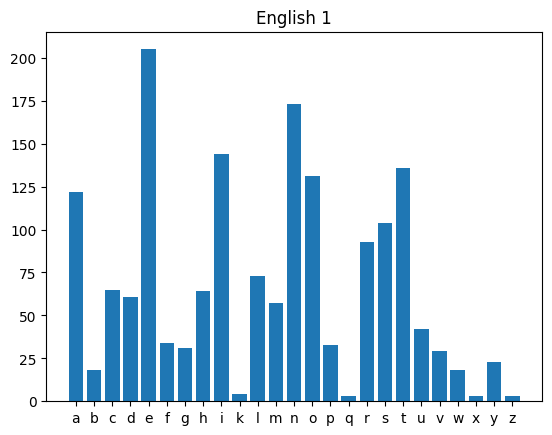

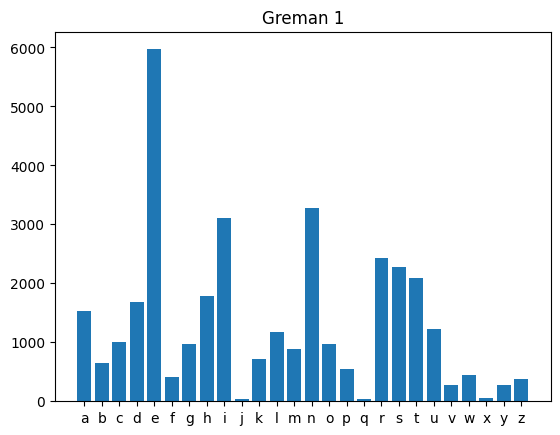

In [13]:
unigram_eng1 = Counter(ngrams(topic1eng,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(fr2,1))
plothistogram(unigram_eng2)
plt.title('Greman 1')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

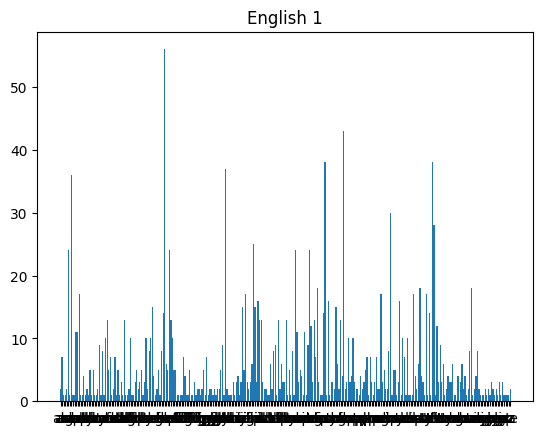

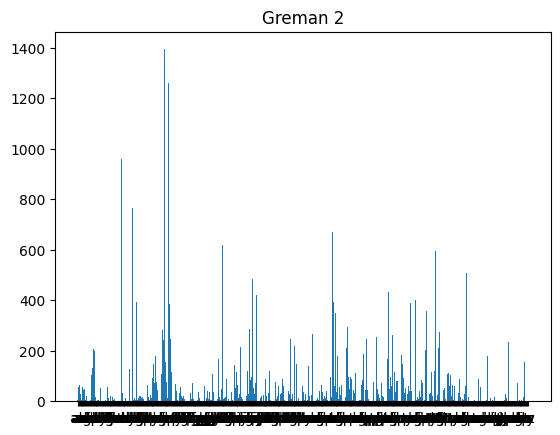

"bigram_fr1 = Counter(ngrams(fr1,2))\nplothistogram(bigram_eng1)\nplt.title('French 1')\nplt.show()\n\nbigram_fr2 = Counter(ngrams(fr2,2))\nplothistogram(bigram_fr2)\nplt.title('French 2')\nplt.show()"

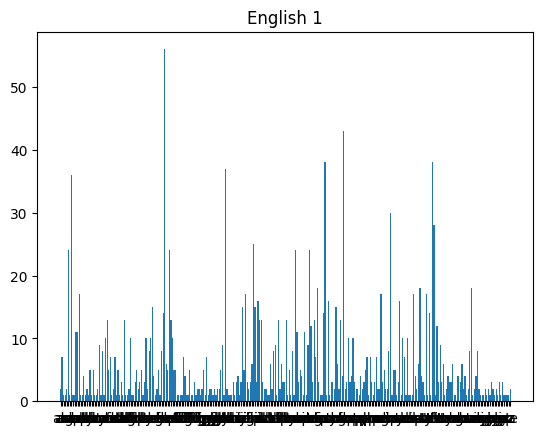

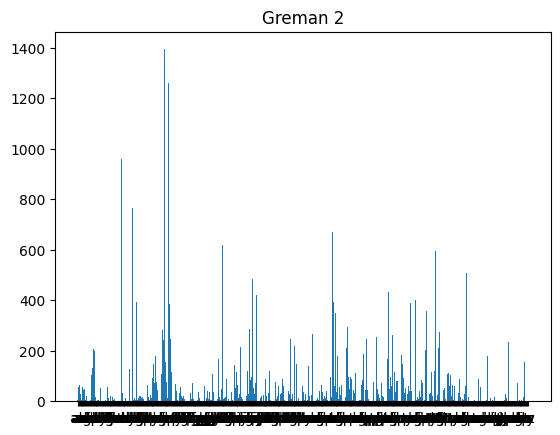

"bigram_fr1 = Counter(ngrams(fr1,2))\nplothistogram(bigram_eng1)\nplt.title('French 1')\nplt.show()\n\nbigram_fr2 = Counter(ngrams(fr2,2))\nplothistogram(bigram_fr2)\nplt.title('French 2')\nplt.show()"

In [16]:
bigram_eng1 = Counter(ngrams(topic1eng,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('Greman 2')
plt.show()

'''bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()'''

Another way to visualize bigrams is to use a 2-dimensional graph.

In [17]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

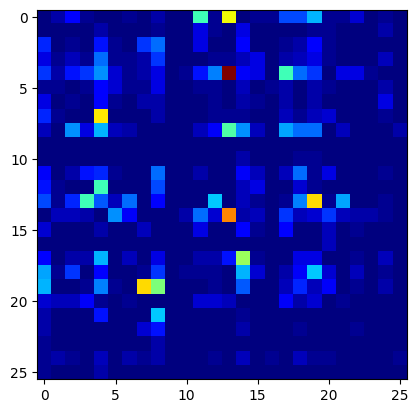

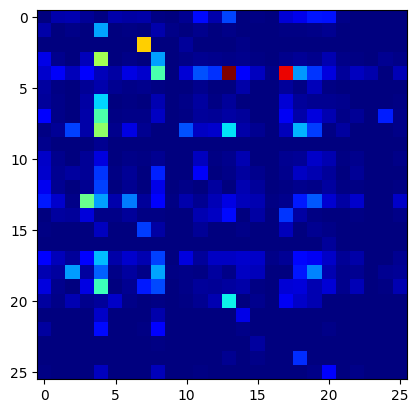

In [18]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)
plt.show()

Let us look at the top 10 ngrams for each text.

In [19]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [20]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\German 2:')
ShowTopN(bifr2)
'''print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)'''


English 1:
('e', 'n') : 56.0
('o', 'n') : 43.0
('t', 'h') : 38.0
('n', 't') : 38.0
('h', 'e') : 37.0
('a', 'n') : 36.0
('r', 'o') : 30.0
('t', 'i') : 28.0
('i', 'n') : 25.0
('m', 'e') : 24.0
\German 2:
('e', 'n') : 1393.0
('e', 'r') : 1258.0
('c', 'h') : 958.0
('d', 'e') : 763.0
('i', 'e') : 730.0
('n', 'd') : 669.0
('h', 'e') : 617.0
('e', 'i') : 614.0
('t', 'e') : 593.0
('u', 'n') : 509.0


"print('\nFrench 1:')\nShowTopN(bifr1)\nprint('\nFrench 2:')\nShowTopN(bifr2)"

In [ ]:
''''from collections import Counter
from nltk import ngrams

trigram_eng1 = Counter(ngrams(topic1eng, 3))
trigram_fr2 = Counter(ngrams(fr2, 3))


In [21]:
import matplotlib.pyplot as plt

def plothistogram(counter, top_n=20):
    top = counter.most_common(top_n)
    labels = [' '.join(gram) for gram, count in top]
    counts = [count for gram, count in top]

    plt.figure(figsize=(10, 6))
    plt.barh(labels, counts, color='skyblue')
    plt.xlabel("Frequency")
    plt.title("Top N-grams")
    plt.gca().invert_yaxis()
    plt.tight_layout()


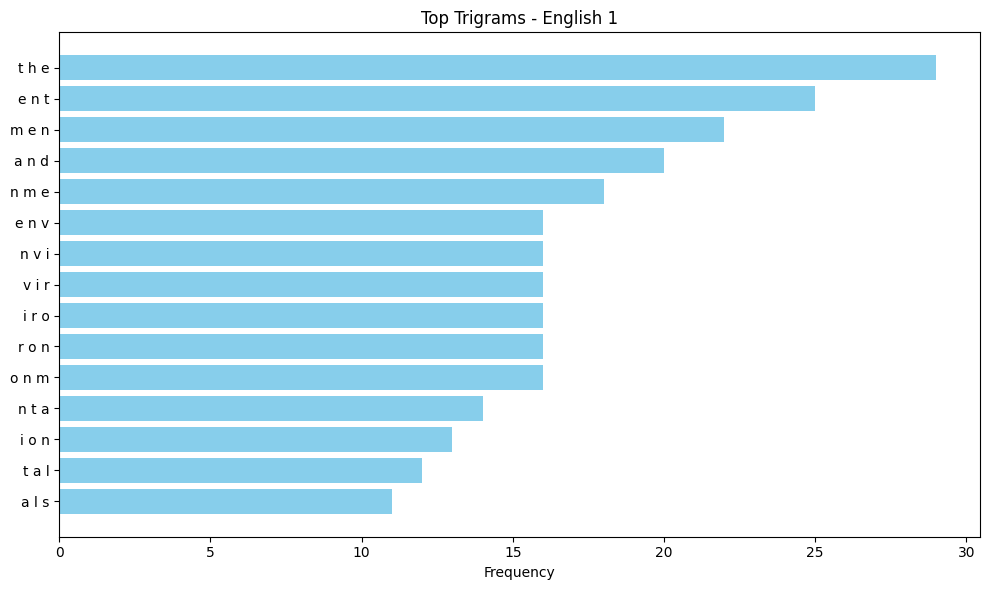

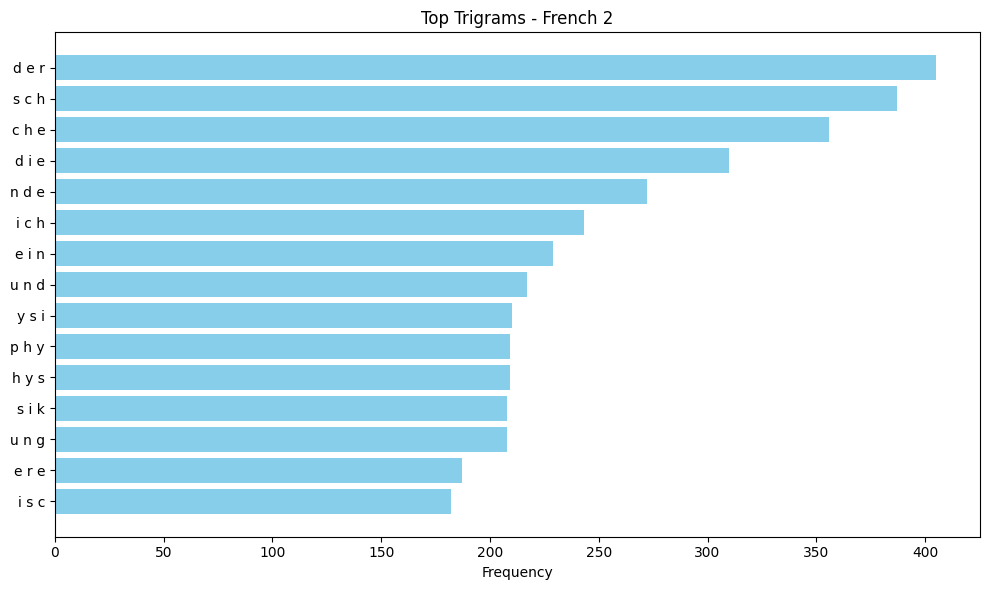

In [22]:
trigram_eng1 = Counter(ngrams(topic1eng, 3))  # generate trigrams
plothistogram(trigram_eng1, top_n=15)
plt.title("Top Trigrams - English 1")
plt.show()

trigram_fr2 = Counter(ngrams(fr2, 3))
plothistogram(trigram_fr2, top_n=15)
plt.title("Top Trigrams - French 2")
plt.show()


In [23]:
from nltk import ngrams
from collections import Counter

# Example: 4-grams
fourgram_eng1 = Counter(ngrams(topic1eng, 4))
fourgram_fr2 = Counter(ngrams(fr2, 4))

fivegram_eng1 = Counter(ngrams(topic1eng, 5))
fivegram_fr2 = Counter(ngrams(fr2, 5))


In [24]:
import matplotlib.pyplot as plt

def plothistogram(counter, top_n=15, title="N-gram Histogram"):
    top = counter.most_common(top_n)
    labels = [' '.join(gram) for gram, count in top]
    counts = [count for gram, count in top]

    plt.figure(figsize=(10, 6))
    plt.barh(labels, counts, color='orchid')
    plt.xlabel("Frequency")
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


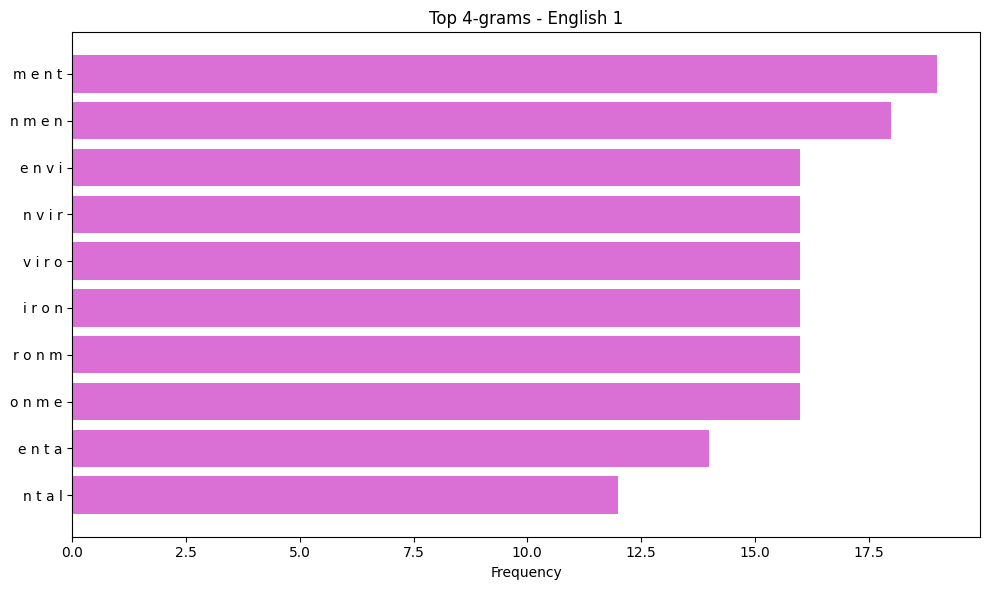

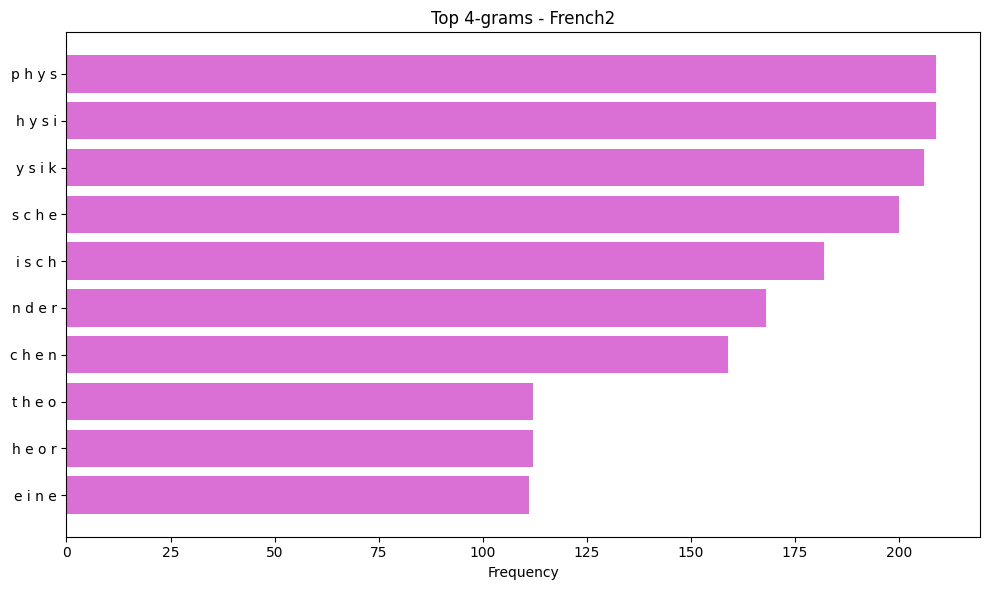

In [25]:
plothistogram(fourgram_eng1, top_n=10, title="Top 4-grams - English 1")
plothistogram(fourgram_fr2, top_n=10, title="Top 4-grams - French2")



In [26]:
import matplotlib.pyplot as plt

def plothistogram(counter, top_n=15, title="N-gram Histogram"):
    top = counter.most_common(top_n)
    labels = [' '.join(gram) for gram, count in top]
    counts = [count for gram, count in top]

    plt.figure(figsize=(10, 6))
    plt.barh(labels, counts, color='blue')
    plt.xlabel("Frequency")
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


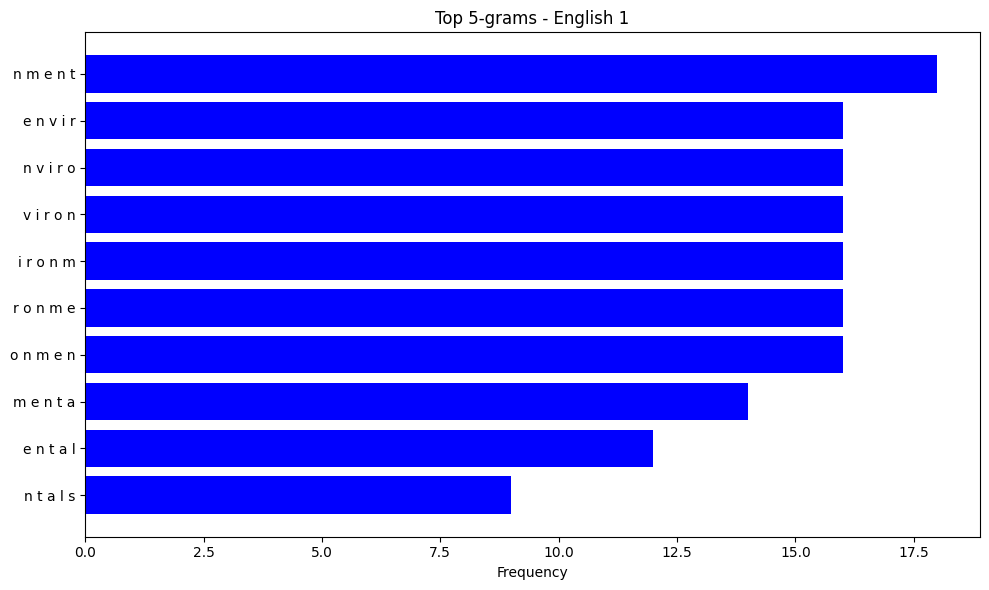

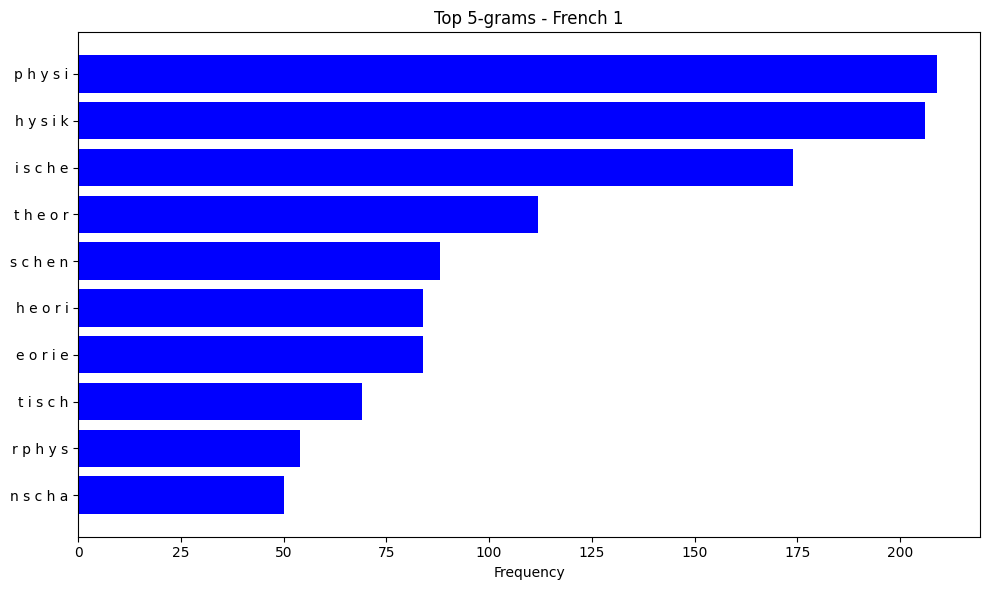

In [27]:

plothistogram(fivegram_eng1, top_n=10, title="Top 5-grams - English 1")
plothistogram(fivegram_fr2, top_n=10, title="Top 5-grams - French 1")

We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [ ]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Extract a subset of the data for our experiment:

In [ ]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

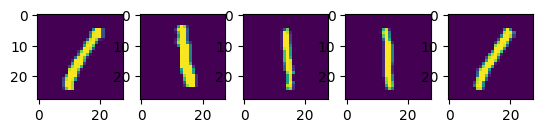

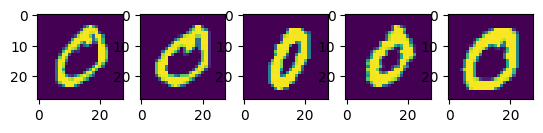

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [ ]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

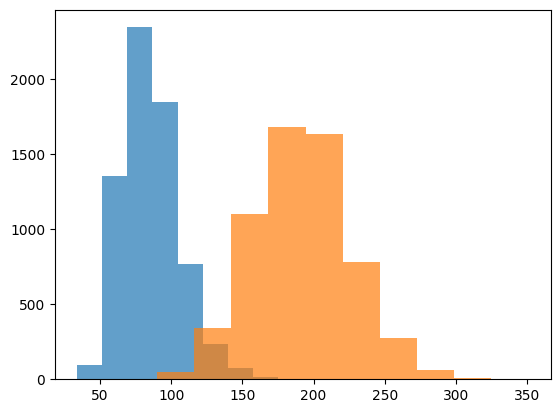

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

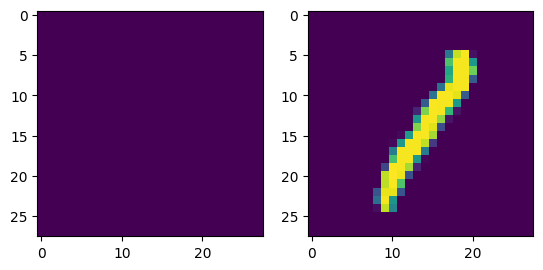

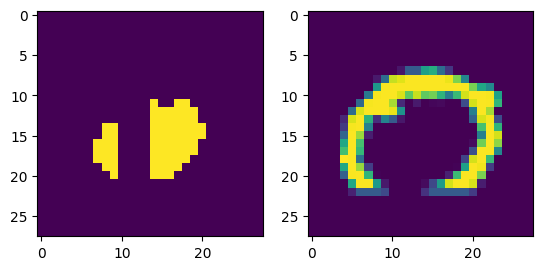

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

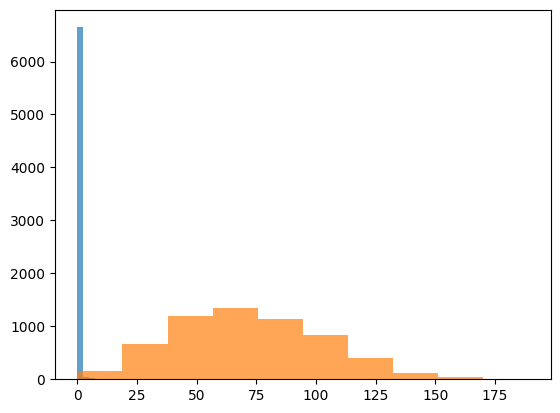

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

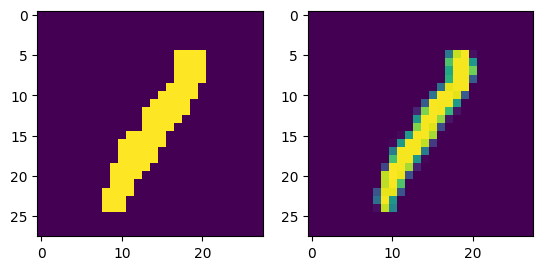

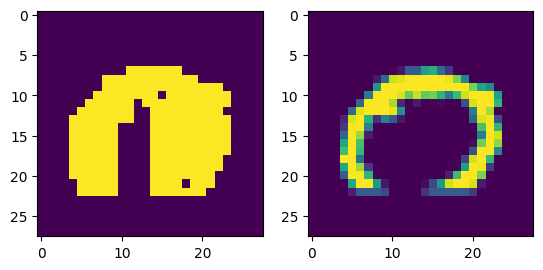

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

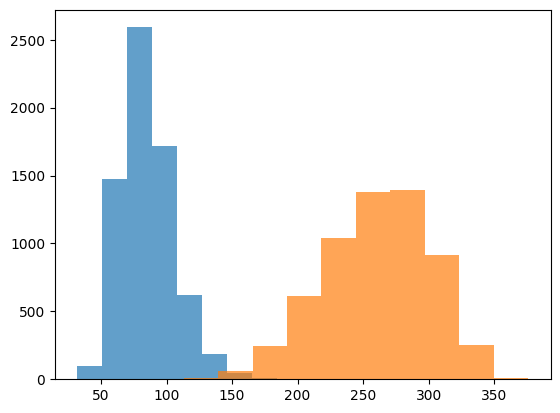

In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

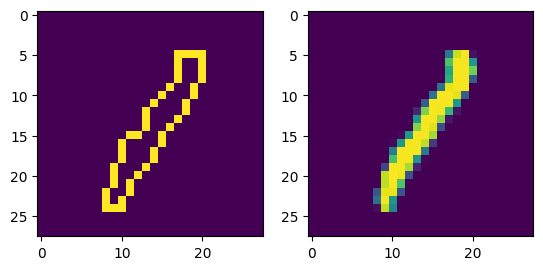

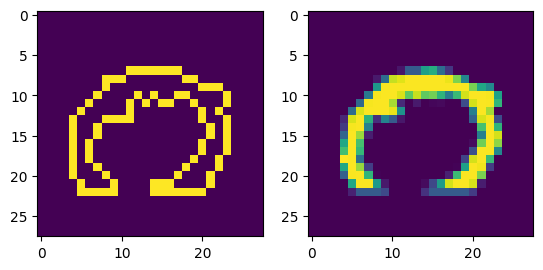

In [ ]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

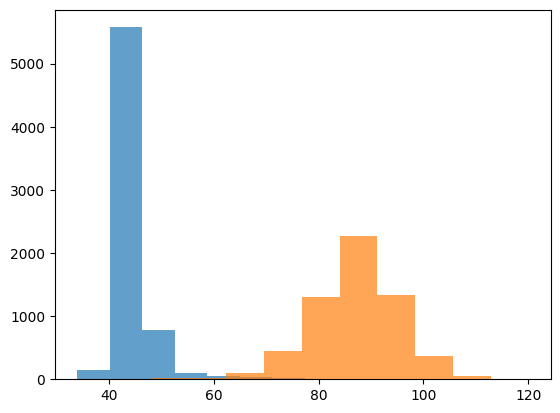

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

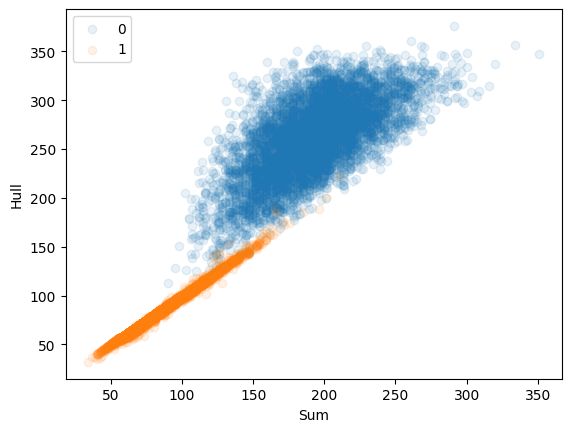

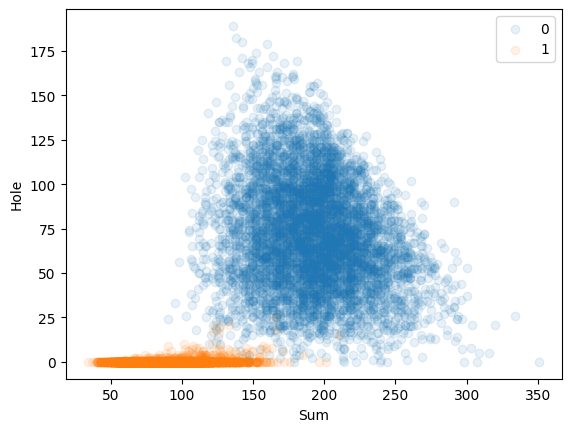

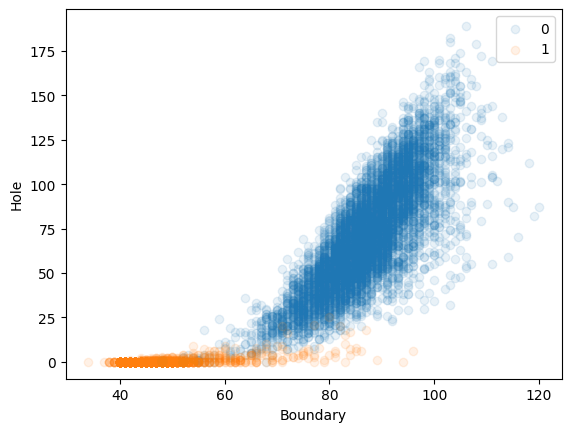

In [ ]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [ ]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

In [ ]:
import numpy as np

def vertical_symmetry(img):
    # Split image vertically
    left = img[:, :14]
    right = np.fliplr(img[:, 14:])
    # Calculate absolute difference
    diff = np.abs(left - right)
    return -np.sum(diff)  # Negative for consistency (higher = more symmetric)


In [ ]:
sym0 = np.array([vertical_symmetry(img) for img in no0])
sym1 = np.array([vertical_symmetry(img) for img in no1])


<ipython-input-104-e52632e82ae3>:9: RuntimeWarning:

overflow encountered in scalar negative



In [ ]:
from scipy.ndimage import center_of_mass

com0 = np.array([center_of_mass(img) for img in no0])
com1 = np.array([center_of_mass(img) for img in no1])


In [ ]:
com0_y, com0_x = com0[:, 0], com0[:, 1]
com1_y, com1_x = com1[:, 0], com1[:, 1]


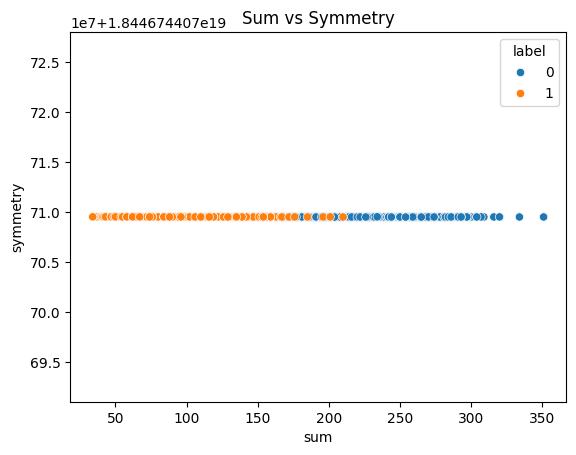

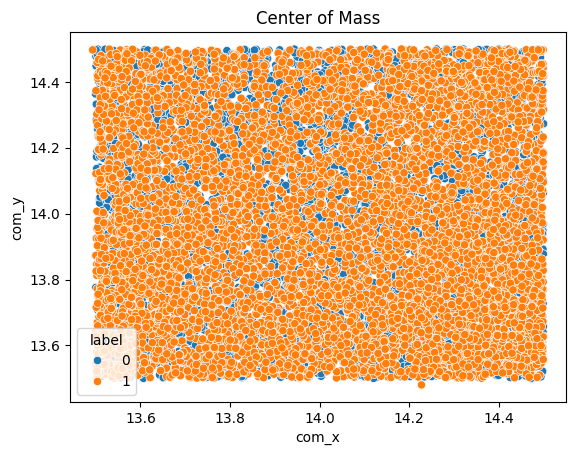

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming sum0, sum1, sym0, sym1 from previous steps
df = pd.DataFrame({
    'sum': np.concatenate([sum0, sum1]),
    'symmetry': np.concatenate([sym0, sym1]),
    'com_x': np.concatenate([com0_x, com1_x]),
    'com_y': np.concatenate([com0_y, com1_y]),
    'label': ['0']*len(sum0) + ['1']*len(sum1)
})

# 2D visualization
sns.scatterplot(data=df, x='sum', y='symmetry', hue='label')
plt.title("Sum vs Symmetry")
plt.show()

# You can also try com_x vs com_y
sns.scatterplot(data=df, x='com_x', y='com_y', hue='label')
plt.title("Center of Mass")
plt.show()


**1. Which is the best combination of features?**

In [ ]:
import numpy as np
from keras.datasets import mnist
from scipy.ndimage import center_of_mass
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from itertools import combinations
import matplotlib.pyplot as plt



# Labels
y = np.concatenate([np.zeros(len(no0)), np.ones(len(no1))])

# Feature 1: Sum of non-zero pixels
sum0 = np.sum(no0 > 0, axis=(1,2))
sum1 = np.sum(no1 > 0, axis=(1,2))
feature_sum = np.concatenate([sum0, sum1])

# Feature 2: Vertical symmetry
def vertical_symmetry(img):
    left = img[:, :14]
    right = np.fliplr(img[:, 14:])
    return -np.sum(np.abs(left - right))

sym0 = np.array([vertical_symmetry(img) for img in no0])
sym1 = np.array([vertical_symmetry(img) for img in no1])
feature_sym = np.concatenate([sym0, sym1])

# Feature 3 & 4: Center of Mass
com0 = np.array([center_of_mass(img) for img in no0])
com1 = np.array([center_of_mass(img) for img in no1])
com = np.vstack([com0, com1])
feature_com_x = com[:, 1]
feature_com_y = com[:, 0]

# Feature dictionary
features = {
    'sum': feature_sum,
    'symmetry': feature_sym,
    'com_x': feature_com_x,
    'com_y': feature_com_y
}

# Test combinations
feature_names = list(features.keys())
results = []

for r in range(1, len(feature_names)+1):
    for combo in combinations(feature_names, r):
        # Stack selected features into X
        X = np.vstack([features[f] for f in combo]).T

        # Train logistic regression
        clf = LogisticRegression()
        clf.fit(X, y)
        y_pred = clf.predict(X)
        acc = accuracy_score(y, y_pred)

        results.append((combo, acc))

# Sort results by accuracy
results.sort(key=lambda x: x[1], reverse=True)

# Display
print("Top feature combinations by accuracy:")
for combo, acc in results:
    print(f"{combo}: {acc:.4f}")


<ipython-input-110-f7fe29e8e6a7>:23: RuntimeWarning:

overflow encountered in scalar negative



Top feature combinations by accuracy:
('sum', 'com_x'): 0.9723
('sum',): 0.9722
('sum', 'com_y'): 0.9720
('sum', 'com_x', 'com_y'): 0.9719
('com_x', 'com_y'): 0.5367
('com_y',): 0.5326
('symmetry',): 0.5323
('com_x',): 0.5323
('sum', 'symmetry'): 0.5323
('symmetry', 'com_x'): 0.5323
('symmetry', 'com_y'): 0.5323
('sum', 'symmetry', 'com_x'): 0.5323
('sum', 'symmetry', 'com_y'): 0.5323
('symmetry', 'com_x', 'com_y'): 0.5323
('sum', 'symmetry', 'com_x', 'com_y'): 0.5323


**2. How would you test or visualize four or more features?**

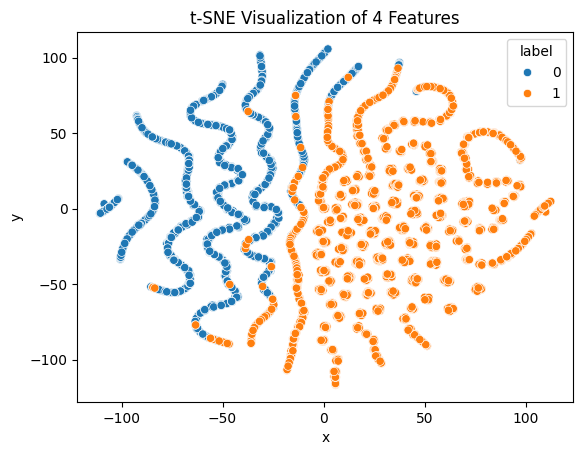

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Stack features
X_all = np.vstack([
    features['sum'],
    features['symmetry'],
    features['com_x'],
    features['com_y']
]).T

# t-SNE to reduce to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_all)

# Create DataFrame for plotting
df_tsne = pd.DataFrame({
    'x': X_tsne[:, 0],
    'y': X_tsne[:, 1],
    'label': ['0']*len(no0) + ['1']*len(no1)
})

# Plot
sns.scatterplot(data=df_tsne, x='x', y='y', hue='label')
plt.title("t-SNE Visualization of 4 Features")
plt.show()


**3. Can you come up with your own features?**

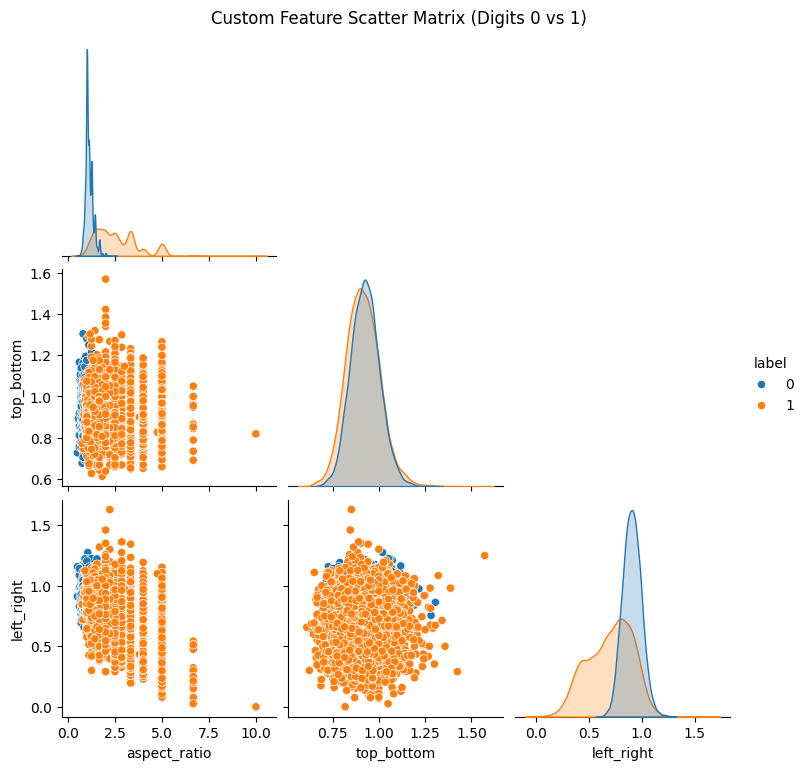

In [ ]:
def aspect_ratio(img):
    rows = np.any(img > 0, axis=1)
    cols = np.any(img > 0, axis=0)
    h = np.sum(rows)
    w = np.sum(cols)
    return h / w if w != 0 else 0
def top_bottom_ratio(img):
    top = np.sum(img[:14, :] > 0)
    bottom = np.sum(img[14:, :] > 0)
    return top / bottom if bottom != 0 else 0
def left_right_ratio(img):
    left = np.sum(img[:, :14] > 0)
    right = np.sum(img[:, 14:] > 0)
    return left / right if right != 0 else 0
features_custom = {
    'aspect_ratio': np.concatenate([
        [aspect_ratio(img) for img in no0],
        [aspect_ratio(img) for img in no1]
    ]),
    'top_bottom': np.concatenate([
        [top_bottom_ratio(img) for img in no0],
        [top_bottom_ratio(img) for img in no1]
    ]),
    'left_right': np.concatenate([
        [left_right_ratio(img) for img in no0],
        [left_right_ratio(img) for img in no1]
    ])
}

# Labels
labels = ['0'] * len(no0) + ['1'] * len(no1)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'aspect_ratio': features_custom['aspect_ratio'],
    'top_bottom': features_custom['top_bottom'],
    'left_right': features_custom['left_right'],
    'label': labels
})

# Plot combinations
sns.pairplot(df, hue='label', corner=True)
plt.suptitle("Custom Feature Scatter Matrix (Digits 0 vs 1)", y=1.02)
plt.show()


**4. Will these features work for different classes other than 0 and 1?**

100%|██████████| 60000/60000 [00:03<00:00, 17301.95it/s]


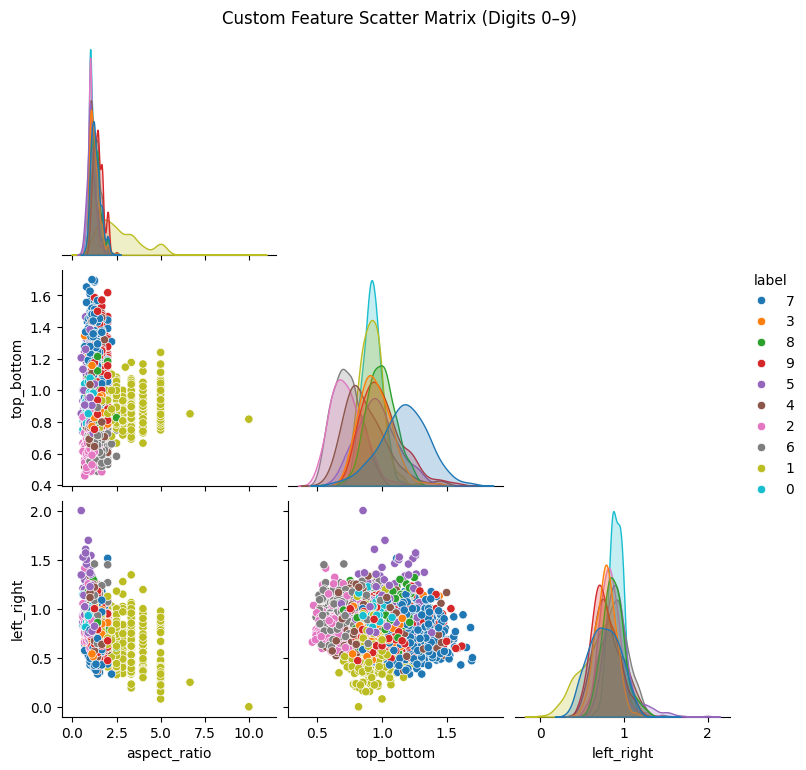

In [ ]:
aspect_ratios = []
top_bottoms = []
left_rights = []
labels = []
from tqdm import tqdm
# Extract features from ALL digits (0–9)
for img, label in tqdm(zip(train_X, train_y), total=len(train_X)):
    aspect_ratios.append(aspect_ratio(img))
    top_bottoms.append(top_bottom_ratio(img))
    left_rights.append(left_right_ratio(img))
    labels.append(str(label))  # convert to string for plotting

# Create DataFrame
df_all = pd.DataFrame({
    'aspect_ratio': aspect_ratios,
    'top_bottom': top_bottoms,
    'left_right': left_rights,
    'label': labels
})

# Sample only 1000-5000 images to avoid clutter
df_sample = df_all.sample(5000, random_state=42)

# Plot
sns.pairplot(df_sample, hue='label', corner=True, palette='tab10')
plt.suptitle("Custom Feature Scatter Matrix (Digits 0–9)", y=1.02)
plt.show()


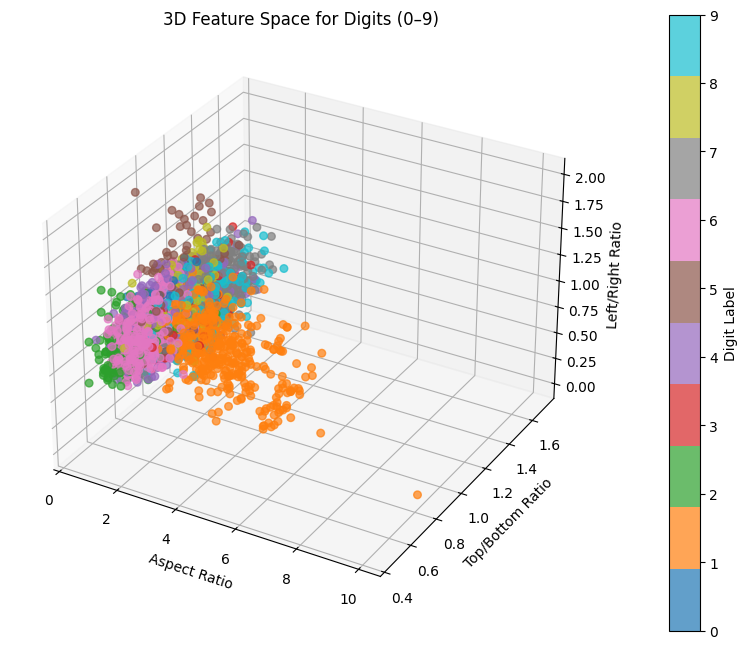

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Sample to avoid clutter
df_sample = df_all.sample(5000, random_state=42)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    df_sample['aspect_ratio'],
    df_sample['top_bottom'],
    df_sample['left_right'],
    c=df_sample['label'].astype(int),
    cmap='tab10',
    s=30,
    alpha=0.7
)

# Labels and title
ax.set_xlabel('Aspect Ratio')
ax.set_ylabel('Top/Bottom Ratio')
ax.set_zlabel('Left/Right Ratio')
ax.set_title("3D Feature Space for Digits (0–9)")

# Legend using colorbar
cbar = plt.colorbar(scatter, ticks=range(10), pad=0.1)
cbar.set_label('Digit Label')
plt.show()


# **5. What will happen if we take more that two classes at a time?**

**Answer : **

**The decision boundaries become more complex.**

**It becomes harder to visualize in 2D or 3D.**

**Some features may generalize well, others might cause overlap.**

**as we can see in the above cell the  feature representation of the**

**0-9 classes are so complex and become to harder visualize**

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?